$\newcommand\E{{\mathbf E}}$
$\newcommand\indi[1]{{\mathbf 1}_{\displaystyle #1}}$
$\newcommand\inde[1]{{\mathbf 1}_{\displaystyle\left\{ #1 \right\}}}$
$\newcommand{\ind}{\inde}$
$\newcommand\P{{\mathbf P}}$

La première partie reprend le problème du vendeur de journeaux à un pas de temps.

Le problème du vendeur de journaux (à une période de temps)

Chaque matin, le vendeur doit décider d’un nombre de journaux à commander 
$u \in \mathbb{U}= \{0, 1, \ldots\}$ au prix unitaire $c > 0$.
La demande du jour est incertaine $ w \in \mathbb{W} =  \{0, 1, \ldots\}$

Si à la ﬁn de la journée il lui reste des invendus: coût unitaire $c_S \in \mathbb{R}$ :
$$
    c_S{(u − w )}_{+} = c_S \max (u − w,0) \quad \text{avec} c + c_S >0 
$$
    
Si à la ﬁn de la journée il n’a pas pu faire face à la demande on associe un coût unitaire $c_M$. 
Le coût lié à la non satisfaction de la demande est
$$
    c_M {(w − u )}_{+} = c_M \max (w − u,0) 
$$


On utilisera plusieurs lois possibles pour la demande aléatoire
La valeur de law permet de selectionner une loi


In [1]:
import numpy as np;
from scipy.special import comb;
from scipy.special import gamma;
import matplotlib.pyplot as plt
import io;

In [2]:
binomiale=1
discrete=2
poisson=3

def choisir_loi(law):

    if law == binomiale:  ## loi binomiale
        n=100
        p=0.5

        buf = io.StringIO()
        buf.write("loi binomiale(%d,%5.2f)" % (n,p))
        title = buf.getvalue()
    
        wi = np.linspace(0,n,num=n+1) ## les valeurs possibles {0,1,...,n}
        ## pdf("bin",x,n,p) = n!/x!(n-x)! p^x (1-p)^n-x 
        nn = n*np.ones(n+1)
        pi=comb(nn,wi, exact=False) * pow(p,wi)*pow(1-p,n-wi)

        mu=n*p; ## moyenne de la binomiale 
        mu1= sum(pi*wi) ; ## vérification 
        if abs(mu-mu1) > 1.e-8:
            print("something wrong in binomial law expectation")
            wait = input("PRESS ENTER TO CONTINUE.")
    
        # un echantillong de taille N
        N=1000
        #W=grand(1,N,"bin",n,p);
        W = np.random.binomial(n, p, N)
 
    if law == discrete: ## une loi discrète 
        n=3
        wi=np.array([30,50,80])
        pi=np.array([1/2,1/4,1/4])
        buf = io.StringIO()
        buf.write("loi discrète sur %d valeurs" % wi.size)
        title = buf.getvalue()
        mu=sum(pi*wi) ## la moyenne

        N=1000
        # un echantillong de taille N
        W=np.random.choice(wi, N, p=pi) # un échantillon de taille N selon la loi pi
    
    if law == poisson: ## loi de Poisson de paramètre mu 
        n=100;
        p=0.5;
        mu=n*p;
        wi=np.linspace(0,n,num=n+1); ## les valeurs possibles 
        pi=( pow(mu,wi) *np.exp(-mu)) / gamma(wi+1);
        buf = io.StringIO();
        buf.write("Poisson %f" % mu);
        title = buf.getvalue();
        moy = sum(pi*wi);
        N=100000;
        W= np.random.poisson(mu, N);
        moye=sum(W)/N # doit converger vers moy lorsque N grand

    return pi, wi, W, title

In [3]:
def hist_plot(samples,support=[],width=5):
# trace des historgrammes de loi à support fini
    if np.size(support)==0:
        support = np.sort(list(dict.fromkeys(samples)))
    histo=np.zeros(support.size);
    for i in range(support.size):
        histo[i]=np.size(np.where(samples==support[i]))/(samples.size)
    # On trace cet histogramme
    plt.bar(support, histo,width)

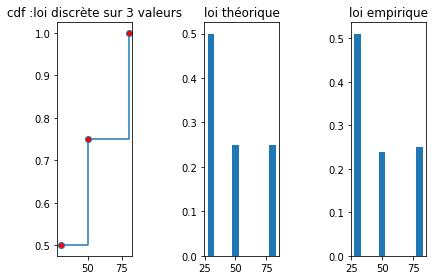

La loi théorique et la loi empirique sont proches mais légérement différentes. C'est normal.


In [4]:
pi, wi, W, title = choisir_loi(discrete) # poisson, binomiale, discrete

fig = plt.gcf()
plt.subplot(1, 3,1);
data1= wi;
plt.step(wi,np.cumsum(pi),where='post',marker='o',markerfacecolor='r');
plt.title("cdf :" + title)

plt.subplot(1, 3,2);
plt.bar(wi,pi,width=5)
plt.title("loi théorique"); 

plt.subplot(1, 3,3);
hist_plot(W,wi)
plt.title("loi empirique"); 

fig.tight_layout()
plt.show()

print("La loi théorique et la loi empirique sont proches mais légérement différentes. C'est normal.")

Question : Écrire une fonction qui calcule $j(u,w)$ puis une fonction qui calcule $J(u)$. Faire un graphique avec les valeurs proposées des constantes et calculer le nombre de journaux qu’il faut commander 

Cas discrêt: Nombre optimal de journaux a commander *30.000000*, Moyenne de la demande *47.500000*



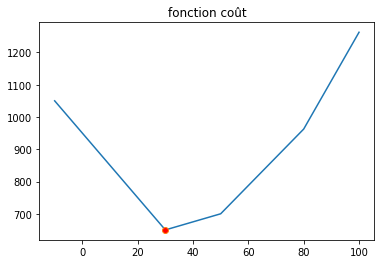

In [5]:
c=10;cm=20;cs=5;cf=200;

# la fonction coût j(u,w)
def jj(u,w):
    return c*u + cs*np.maximum(u - w,0) + cm*np.maximum(w - u,0);


def J(u,pi,wi):
    #return np.sum(pi*j(u,wi))
    return c*u + cs*sum(pi*np.maximum(u - wi,0)) + cm*sum(pi*np.maximum(wi - u,0));

def resultats(pi,wi,dessin='oui'):
# draw the function and the minimum 

    # remplir val avec les valeurs de J(u) quand u varie de -10 a 100 avec un pas de 1
    u=np.linspace(-10,100,num=111)
    val=np.zeros(u.size);
    for i in range(0,u.size):
        val[i]=J(u[i],pi,wi)
    
    # recherche du min 
    imin=np.argmin(val)
    uopt = u[imin]
    
    if dessin=='oui':
        plt.plot(u,val);
        plt.title("fonction coût");
        plt.plot(uopt,val[imin],marker='o',markerfacecolor='r')

        print("Nombre optimal de journaux a commander *%f*, " % uopt,end='');
        print("Moyenne de la demande *%f*\n" % sum(wi*pi));

    return uopt

pi, wi, W, title = choisir_loi(discrete) # poisson, binomiale, discrete
print('Cas discrêt: ',end='')
resultats(pi,wi)
plt.show()


Question : Vériﬁer sur un graphique que le nombre de journaux optimal à commander s’obtient par la formule :
$$
 uopt = \inf \{z \in \mathbb{R} \vert F(z) \ge \frac{(c_M − c)}{ (c_M + c_S )}\}
$$

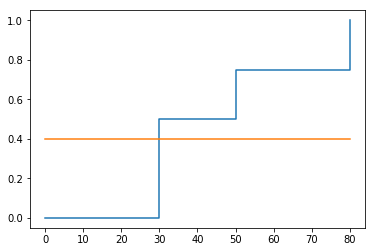

In [6]:
# On dessine F 

fstar = (cm-c)/(cm+cs);
Fv= np.cumsum(pi);
plt.clf()
xx=np.hstack((np.array([0]),wi));
yy=np.hstack((np.array([0]),Fv));
plt.step(xx,yy,where='post') # marker='o',markerfacecolor='r');
plt.plot(xx,fstar*np.ones(xx.size))


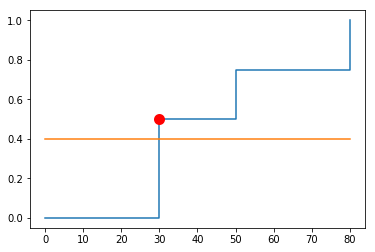

In [7]:
# chercher l'indice qui donne uopt 

kopt=0
for i in range(0,Fv.size):
    if Fv[i] >= fstar:
        kopt=i
        break;
   
plt.step(xx,yy,where='post') # marker='o',markerfacecolor='r');
plt.plot(xx,fstar*np.ones(xx.size))
plt.plot(wi[kopt],Fv[kopt],marker='o',markeredgewidth=5,markeredgecolor='r',markerfacecolor='r');


1.3 On utilise maintenant une loi discrète à 3 valeurs

Dans le cas précédent, on trouve que le nombre de journaux optimal à commander est très voisin de la moyenne de la demande. On cherche ici à construire un exemple ou les deux nombres seront franchement diﬀérents.


Question 4 Reprendre ce qui précède, en vous plaçant maintenant dans le cas test=2 et chercher à caler des valeurs des probabilités qui permettent d’obtenir le résultat souhaité.


__1.4 La loi du coût__

Question 5 Dans les cas test=1 et test=2, faites un graphique de la loi du coût pour diverses valeurs de la commande u. On procédera de deux façons diﬀérentes

    En calculant la loi du coût.
    En approchant la loi du coût au moyen de tirages de la demande (loi empirique des coûts).



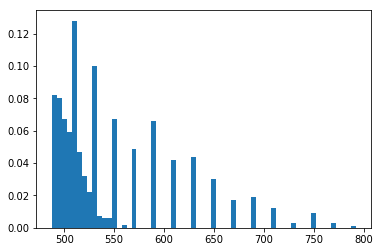

53


<BarContainer object of 52 artists>

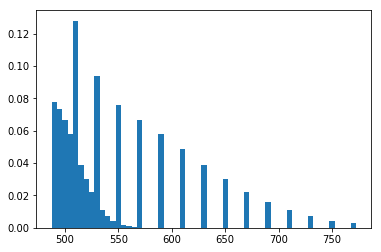

In [8]:
plt.clf()

def draw_cost(u,W):
    #count, bins, ignored =   plt.hist(j(u,W),density=True)
    samples=jj(u,W)
    max_samples=max(samples)
    hist_plot(samples,width=5)
    return max_samples

# poisson , discrete, binomiale
pi, wi, W, title = choisir_loi(binomiale)

u=49
# commence par traiter le problème par simulation (avec W)
max_samples=draw_cost(u,W);
plt.show()

# calcul de la loi exacte
valeurs=jj(u,wi) # toutes les valeurs de j(u,wi[i])
support = np.sort(list(dict.fromkeys(valeurs))) 
      # on calcule le support de la loi
      # en enlevant les valeurs en double
loi=np.zeros(support.size) # on va calculer la loi de j(u,W)
for i in range(support.size):
    for k in range(wi.size):
        if jj(u,wi[k]) == support[i]:
            loi[i]=loi[i]+pi[k]

# on tronque l'histogramme au delà de la valeur max_samples
for imax in range(support.size):
    if support[imax] > max_samples:
        print(imax);break
imax=imax-1
            
# On trace cet histogramme
plt.bar(support[0:imax], loi[0:imax],width=5)

__1.6 Une stratégie $[s,S]$__

On regarde maintenant un cas ou le vendeur à déjà des journaux et ou il paye un coup ﬁxe si il commande des journaux. 
On cherche à retrouver ici le fait que la stratégie optimale est de la forme $[s,S]$.

Question 7 On se placera dans le cas test=1. Calculer le nombre optimal de journaux à commander 
suivant la valeur du stock initial. 
Vériﬁer que la stratégie est bien de la forme $[s,S]$ : 
on remonte le stock au niveau $S$ si il est inférieur à $s$ et on ne fait rien sinon. 
Calculer $s$ par la formule
$$
s = \sup \{z \in (- \infty, S) \vert J(z) \ge c_F + J(S ) \} 
$$

1) Calcul par une méthode brutale : valeur de s=25.000000 et de S=49.000000

On vérifie que pour x en dessous de  25.0 , x+uopt=cte= 49.0


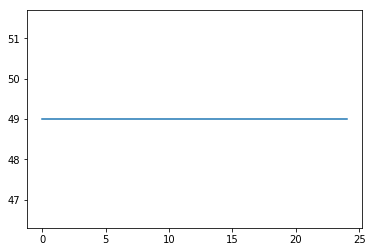

et que, au dela de  25.0 ,on ne commande plus rien, xuopt=0


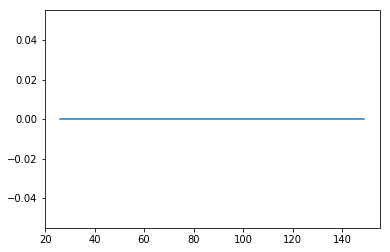

On vérifie aussi la formule de s donnée dans le cours (p.11 cours-4) donne les mêmes résultats.

2) Formule du cours: valeur de s=25.000000 et de S=49.000000



In [9]:
# On regarde maintenant un cas ou le vendeur à déjà des journaux 
# et ou il paye un coup fixe s'il commande des journaux 
# on voit une stratégie [s,S] 

def Jtilde(u,x,pi,wi):
    return cf*(u>0) + J(u+x,pi,wi) -c*x

# Le but est de verifier que l'on a une stratégie [s,S]

# Choix du modèle : poisson , discrete, binomiale
pi, wi, W, title = choisir_loi(binomiale)

# Calcul de S
# S=uopt, où uopt est l'argmin de J(u) (cf Slide 11/20)
# uopt est caclulé dans la fonction résultat
uopt=resultats(pi,wi,dessin='non') # on ne veux pas de dessin ici
S=uopt 

# Il nous faut maintenant calculer s
size=int(max(wi))
xv=np.linspace(0,2*size, num=2*size+1)
xuopt=xv.copy()
U=np.linspace(0,2*size, num=2*size+1)
Ju=U.copy()

for i in range(0, xv.size):
    for j in range(0, U.size):
        Ju[j]= Jtilde(U[j],xv[i],pi,wi) # à xv[i] stock fixé, on calcule les coûts pour les commandes U[j]  
    k = np.argmin(Ju) # on optimize en Ju
    xuopt[i]= U[k] # ca qui nous donne la commande optimale pour le stock initial xv[i]

# s = la valeur la plus grande où le contrôle est non nul
# on cherche donc l'indice iopt de la valeur la plus petite où le 
# contrôle est non nul. xv[iopt-1] donne la valeur de s cherchée.
iopt=-1;
for i in range(0, xuopt.size):
    if xuopt[i] == 0:
        iopt=i
        break
# (iopt-1) est le dernier indice ou la controle est non nul
# et s est la valeur de x correspondante xv[iopt-1]
s = xv[iopt-1]
print("1) Calcul par une méthode brutale : valeur de s=%f et de S=%f\n" % (s, S))

plt.clf()

# on vérifie que pour x en dessous de s, x+uopt=cte=S
print("On vérifie que pour x en dessous de ",s,", x+uopt=cte=",S)
limite=iopt-1 # int(s)
plt.plot(xv[:limite],xv[:limite]+xuopt[:limite])
plt.show()

# au dela xuopt=0 (on ne commande rien), donc on est sur la droite y = x!
print("et que, au dela de ",s,",on ne commande plus rien, xuopt=0")
#plt.plot(xv[int(s)+1:150],xv[int(s)+1:150]+xuopt[int(s)+1:150])
plt.plot(xv[limite+1:150],xuopt[limite+1:150])
plt.show()

# On vérifie le formule de s donnée dans le cours (p.11 cours-4) fonctionne
print("On vérifie aussi la formule de s donnée dans le cours (p.11 cours-4) donne les mêmes résultats.\n")
Jv=np.zeros(xv.size);
for i in range(0,xv.size):
    Jv[i]=J(xv[i],pi,wi)
JS=J(S,pi,wi) # J(S)
costs = Jv - (cf + JS)
# calcul du plus grand z où J(z) >= c_F + J(S)
iopt=-1
for i in range(0,xv.size):
    if costs[i] <=0:
        iopt=i
        break
if iopt < 0: 
    s=0 
else:
    s=xv[iopt-1]
    
print("2) Formule du cours: valeur de s=%f et de S=%f\n" % (s, S))

# Le problème à plusieurs pas de temps $T$

__L'équation de Bellman, cas général__

On cherche à calculer la fonction valeur $V(t,x)$ en utilisant l'équation de programmation dynamique (ou équation de Bellman) donnée par le cours (slide 15 p.80). $V(t,x)$ représente la valeur du critère pour le meilleur contrôle
possible en partant de $x$ à l'instant $t$.

Pour cela, il faut connaître:

1) la dynamique de la chaîne contrôlée ${\color{red} f}(x,u,w)$ fonction de la postion actuelle, du contrôle $u$ et de l'aléa $w$. $X$ suit alors une dynamique fonction de la suite des choix de contrôles $U_t$
$$
X_{t+1} = {\color{red} f}(X_t,U_t,W_{t+1})
$$

2) le coût au pas de temps $n$, ${\color{red} L}(n,x,u)$ fonction du temps  $n$, du contrôle $u$ et de la position actuelle $x$.

3) le coût final ${\color{red} K}(x)$.

Avec ces ingrédient l'équation de Bellman s'écrit (slide 15 p. 80). 

$$
\left\{
        \begin{array}{l}
          v(n,x) = \min_{u\in A} \left\{ {\bf E}(v(n+1,{\color{red} f}(x,u,W_{t+1})) + {\color{red} L}(n,x,u) \right\},
          \quad n< N\\
          v(N,x) = {\color{red} K}(x),
        \end{array}
      \right.  
$$

Noter que par rapport aux transparents, pour simplifier, on a choisi de ne pas faire dépendre $L$ de $W_{t+1}$ mais 
uniquement de $x$ et $u$.

__Le cas du vendeur de journaux: rappels__

Dans le cas du vendeur de journaux, les fonctions ${\color{red} f}$, ${\color{red} L}$ et ${\color{red} K}$ 
sont définies dans le cours de la façon suivante.

1) La fonction ${\color{red} f}$ est donnée (voir slide 12 p.68) par ${\color{red} f}(x,u,w)=x+u-w$. __Interprétation?__

2) La fonction ${\color{red} K}$ est donnée (voir le slide 4 p.74. __Interprétation?__
$$
   K(x) = c_s (x)_+ + c_M (-x)_+. 
$$

3) La fonction $L$ vaut ${\color{red} L}(1,u,x)=c_0(u,x)$ et pour $t> 1$, ${\color{red} L}(t,u,x)=c_t(u,x)$, les fonctions $c_0$ et $c_t$ étant définies sur le slide 4 p.74. __Interprétation?__

$$
c_0 (u,x) = c_F \inde{u>0} + cu
$$

$$
c_t (u,x) = c_F \inde{u>0} + cu + c_s (x)_+ + c_M (-x)_+
$$


Le temps va de $t=1$ à $t=T$. 

Pour commencer on pose $T=2$ et l'on souhaite vérifier que l'on retrouve le problème du vendeur à un pas de temps.

In [10]:
alpha = 1

def ct(u,x):
    # coût instantané pour t autre que la date de départ 
    return cf*(u>0) + c*u + alpha*cs*np.maximum(x,0) + alpha*cm*np.maximum(-x,0) 

def c0(u):
    # coût instantané pour t=1 
    return cf*(u>0) + c*u

def K(x):
    # coût final 
    return cs*np.maximum(x,0) + cm*np.maximum(-x,0) 

On tronque la dynamique pour rester dans un domaine borné $[-100,100]$.

In [11]:
xmin = -200; xmax = 200;

def f(x,u,w):
    return min(max(x+u-w,xmin),xmax)

__Question 1.__ On commence avec $T=2$ pour retrouver les résultats du vendeur de journaux à un pas de temps.
Calul de $V_T$. 

In [12]:
# Choix du modèle : poisson , discrete, binomiale
pi, wi, W, title = choisir_loi(discrete)

T=4 # l'Horizon 

etats= np.linspace(xmin,xmax, num=-xmin+xmax+1) ## les etats possibles (nbre de journeaux en stock) dans un domaine borné 
allu=  np.linspace(0,xmax,num=xmax+1)   ## les commandes de journaux possibles

VT = pow(alpha,T)*K(etats); # fonction de Bellman en T
UT = 0*etats; # pas de contrôle en T

# On stocke les fonctions de Bellman dans $V$ and le contrôle optimal dans $U$.
V=[VT]; U=[UT];

for j in range(0,T-1):
    t=T-1-j
    print("calcul de V_t pout t=%d" % t)
    Vtp1=V[0]
    Vt = 0*etats;
    Ut = float('nan')*np.ones(-xmin+xmax+1); 
    for i in range(0,etats.size):
        # on boucle sur les états possibles 
        # x= AFAIRE 
        mcost= float('inf') # on initialise "mcost" à +infty
        # à la fin du corps de la boucle qui suit "mcost" contiendra le coût optimal 
        # pour tout les états et à l'instant t 
        for k in range(0,allu.size):
            # boucle sur les contrôles possible 
            # le contrôle courant est u 
            # u =  AFAIRE 
            # on va calculer dans "cost" le cout obtenu pour ce contrôle "u" 
            cost=0
            for l in range(0,wi.size):
                # boucle sur les aléas "w"
                # w = AFAIRE depend de l et wi 
                # calculer l'état atteint si on part de x que le contrôle est u et l'aléa w 
                # xtp1= AFAIRE 
                # dans ix il faut trouver l'indice dans la liste des etat de l'état xtp1
                # ix = A FAIRE on pourra utiliser les méthodes tolist() et index() : 
                #   i=vecteur.tolist().index(x) permet de retrouver dans "vecteur"
                #   l'indice "i" tel que vecteur[i]=x
                # calculer le cout de Bellman pour (x,u,w)
                # On fera attention au fait que la fonction de coût instantannée dépend est 
                # c0 ou ct suivant que t==1 ou t != 1 
                # On n'oubliera pas que l'on doit utiliser pi 
                # lcost = {le coût pour l'aléa w} * proba(w)
                #if t==1:
                #     lcost = 0 # AFAIRE 
                #else:
                #     lcost = 0 # AFAIRE 
                # cost = sum_w {le coût pour l'aléa w} * proba(w) = E(coût)
                # on rajoute lcost à cost 
                cost = cost + lcost 
            # on a maintenant le cout "cost" correspondant au controle "u", 
            # on doit le comparer au minimum des couts "mcost" 
            # puisque "mcost" doit contenir la plus petite valeur de tous les contrôles            
            # mettre à jour "mcost" en fonction de "cost"
            # mettre à jour l'indice "kumin" correspondant au controle minimisant
        # on conserve la valeur de "la fonction de valeur" Vt[i] correspondant à etats[i] en l'instant t
        # et le controle optimal Ut[i] correspondant à etats[i] à l'instant t
        # Il y a un décalage de 1, Vt[0] correspond à T=1
        Vt[i]= mcost
        Ut[i]= allu[kumin]
    V=np.concatenate(([Vt],V))       
    U=np.concatenate(([Ut],U))

calcul de V_t pout t=3
calcul de V_t pout t=2
calcul de V_t pout t=1


Dessiner les fonctions valeurs à $t=1$ et $t=T$

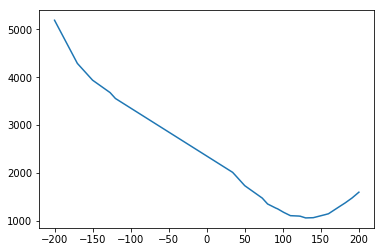

In [13]:
t=1;plt.plot(etats,V[t-1])

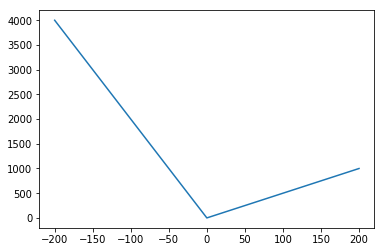

In [14]:
t=T;plt.plot(etats,V[t-1]) # en t=T on retrouve la fonction deterministe correspondant au cout final

Dessiner les commandes optimales à $t=1$ et retrouver le fait que la commande optimale est une stratégie $[s,S]$ ?

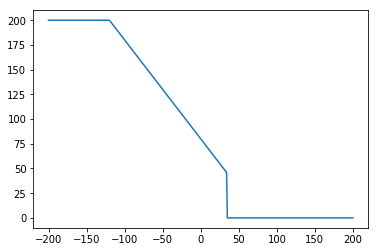

In [15]:
t=1;plt.plot(etats,U[t-1])

Recommencer le calcul en faisant $T=3$, $T=4$, $T=5$, ... et regarder l'impact sur l'évolution du contrôle optimal.

T =  4


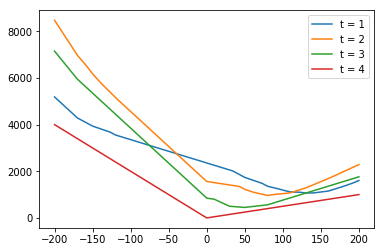

In [16]:
print('T = ',T)
for j in range(0,T):
    text='t = '+str(j+1)
    plt.plot(etats,V[j],label=text)
plt.legend(loc='upper right')

T =  4


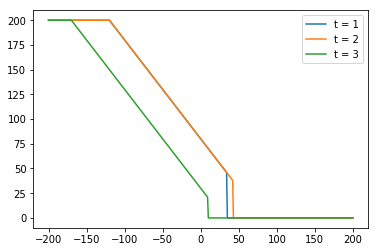

In [31]:
print('T = ',T)
for j in range(0,T-1):
    text='t = '+str(j+1)
    plt.plot(etats,U[j],label=text)
plt.legend(loc='upper right')
